(lecture10:the-uniform-distribution)=
# The uniform distribution

In {ref}`lecture10:example-manufacturing-steel-balls`, we had a random variable
for which all values between a given interval were equally probable.
This is a very common situation covered by the so-called *uniform distribution*.

Let's start with the simplest case: a random variable taking values between 0 and 1
with constant probability density.
We write:

$$
X\sim U([0,1]),
$$

and we read

> $X$ follows a uniform distribution taking values in $[0,1]$.

The probability density of the uniform is constant in $[0,1]$ and zero outside it.
We have:

$$
p(x) := \begin{cases}
c,&\;0\le x \le 1,\\
0,&\;\text{otherwise}.
\end{cases}
$$

What should the constant $c$ be?
Just like in {ref}`lecture10:example-manufacturing-steel-balls`, you can find it by ensuring the PDF
integrates to one (see [PDF Property 5](lecture10:pdf-property-5):

$$
\int_0^1 p(x) dx = 1 \Rightarrow c = 1.
$$

So, the PDF is:

$$
p(x) := \begin{cases}
c,&\;0\le x \le 1,\\
0,&\;\text{otherwise}.
\end{cases}
$$

To find the CDF, we can use [PDF Property 3](lecture10:pdf-property-3):
$$
F(x) = p(X \le x) = \int_0^x p(\tilde{x}) d\tilde{x} = \int_0^x d\tilde{x} = x.
$$
Obviously, we have $F(x) = 0$ for $x < 0$ and $F(x) = 1$ for $x > 1$.

Using this result, we can find the probability that $X$ takes values in $[a,b]$ for $a < b$ in $[0,1]$.
It is:
$$
p(a \le X \le b) = F(b) - F(a) = b - a.
$$

## Instantiating the uniform using `scipy.stats`

Let me know show you how you can make a uniform random variable using scipy:

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', 'svg')
import numpy as np
import scipy.stats as st

In [2]:
X = st.uniform()

Here is how you can get some samples:

In [3]:
X.rvs(size=10)

array([0.33842053, 0.57010738, 0.1323871 , 0.58357996, 0.68875828,
       0.67923023, 0.84656861, 0.75593012, 0.25791332, 0.13214875])

You can evalute the PDF at any point like this:

In [8]:
X.pdf(0.5)

1.0

In [9]:
X.pdf(-0.1)

0.0

In [10]:
X.pdf(1.5)

0.0

Let's plot the PDF:

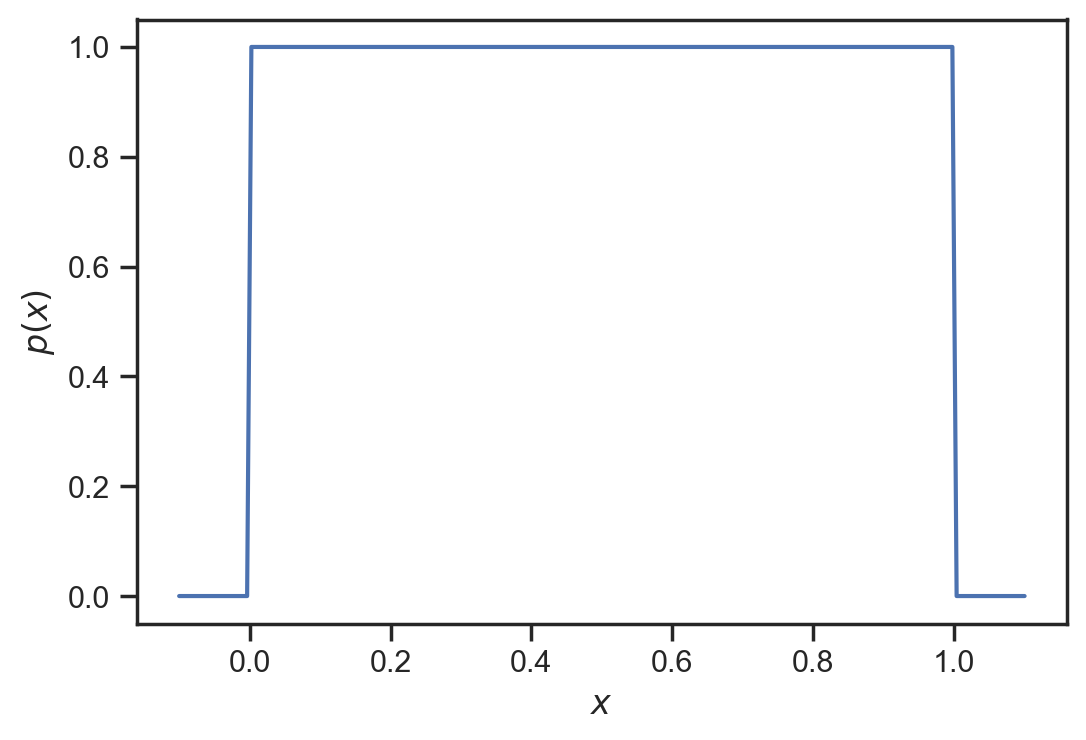

In [15]:
fig, ax = plt.subplots()
xs = np.linspace(-0.1, 1.1, 200)
ax.plot(xs, X.pdf(xs))
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$');

You can evaluate the CDF like this:

In [11]:
X.cdf(-0.5)

0.0

In [12]:
X.cdf(0.5)

0.5

In [13]:
X.cdf(1.2)

1.0

Let's plot the CDF:

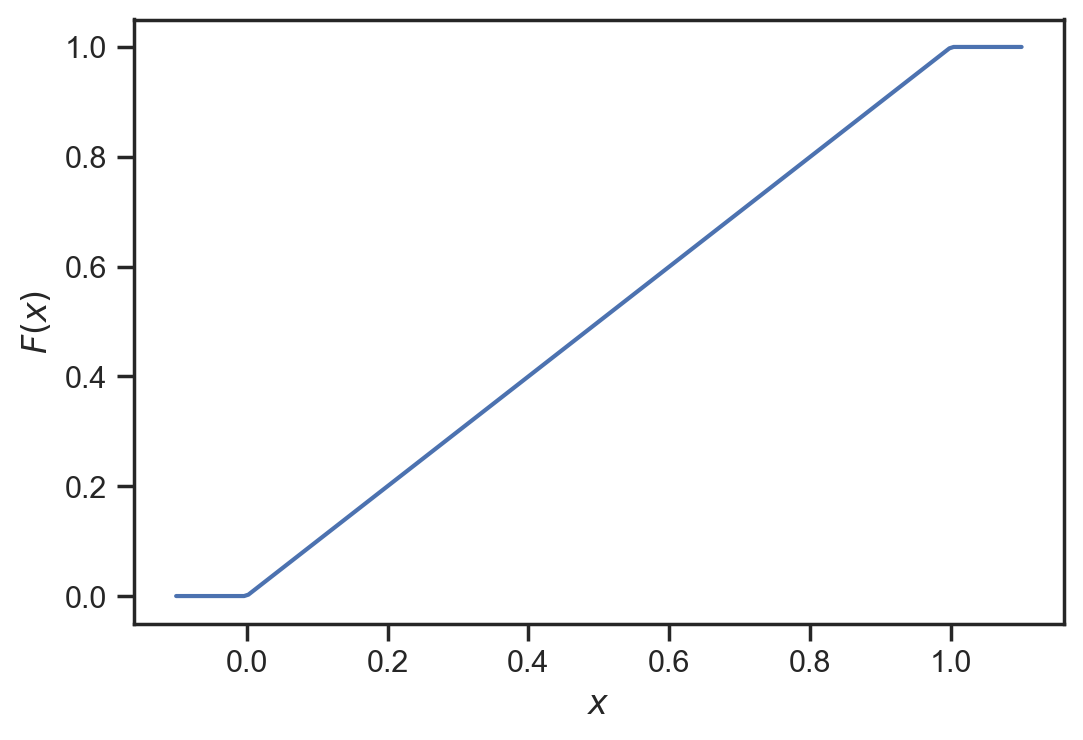

In [17]:
fig, ax = plt.subplots()
ax.plot(xs, X.cdf(xs))
ax.set_xlabel('$x$')
ax.set_ylabel('$F(x)$');

Finally, let's find the probability that $X$ is between two numbers $a$ and $b$.
For the uniform it is, of course, trivial, but let's see how it is done using the `scipy` functionality:

In [18]:
a = -1.0
b = 0.3
prob_X_is_in_ab = X.cdf(b) - X.cdf(a)
print('p({0:1.2f} <= X <= {1:1.2f}) = {2:1.2f}'.format(a, b, prob_X_is_in_ab))

p(-1.00 <= X <= 0.30) = 0.30


# The uniform distribution over an arbitrary interval $[a, b]$

The uniform distribution can also be defined over an arbitrary interval $[a,b]$.
We write:
$$
X \sim U([a, b]).
$$
We read:

> $X$ follows a uniform distribution on $[a, b]$.

The PDF of this random variable is:

$$
p(x) = \begin{cases}
c,&\;x\in[a,b],\\
0,&\;\text{otherwise},
\end{cases}
$$

where $c$ is a positive constant.
This simply tells us that the probability density of finding $X$ in $[a,b]$ is something positive and that the probability density of findinig outside is exactly zero.
This is exactly the situation we had in {ref}`lecture10:example-manufacturing-steel-balls`.
The positive constant $c$ is determined by imposing the normalization condition:

$$
\int_{-\infty}^{+\infty}p(x)dx = 1.
$$

This gives:

$$
1 = \int_{-\infty}^{+\infty}p(x)dx = \int_a^bc dx = c \int_a^bdx = c (b-a).
$$

From this we get:

$$
c = \frac{1}{b - a},
$$

and we can now write:

$$
p(x) = \begin{cases}
\frac{1}{b-a},&x \in [a, b],\\
0,&\;\text{otherwise},
\end{cases}
$$

From the PDF, we can now find the CDF for $x \in [a,b]$:

$$
F(x) = p(X\le x) = \int_{-\infty}^x p(\tilde{x})d\tilde{x} = \int_a^x \frac{1}{b-a}d\tilde{x} = \frac{1}{b-a}\int_a^xd\tilde{x} = \frac{x-a}{b-a}.
$$


## Instantiating the generic uniform using `scipy.stats`:
Let's instantiate using `scipy.stats`:

In [19]:
a = -2.0
b = 5.0
X = st.uniform(loc=a, scale=(b-a))

Some samples:

In [20]:
X.rvs(size=10)

array([-1.63839392, -1.08615066, -1.9249188 , -0.86574048, -0.01377033,
        0.91441   ,  2.94486672, -0.90602192, -0.44926847,  4.28172985])

In [ ]:
The PDF:

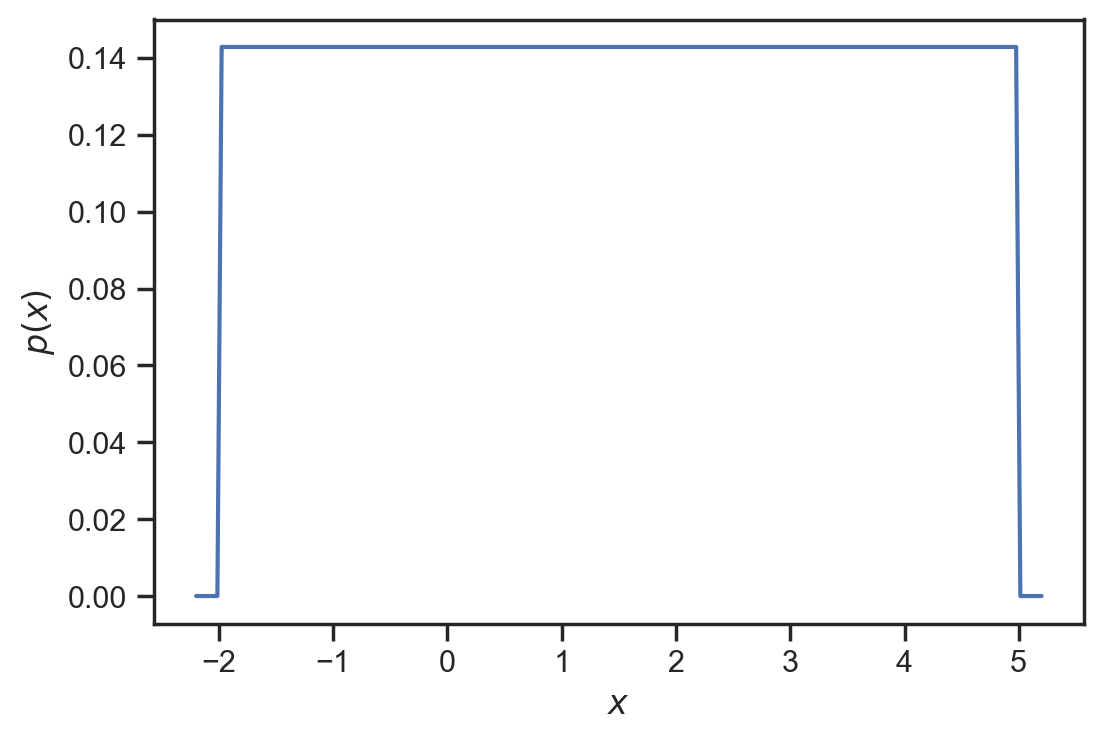

In [24]:
fig, ax = plt.subplots()
xs = np.linspace(a - 0.2, b + 0.2, 200)
ax.plot(xs, X.pdf(xs))
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$');

The CDF:

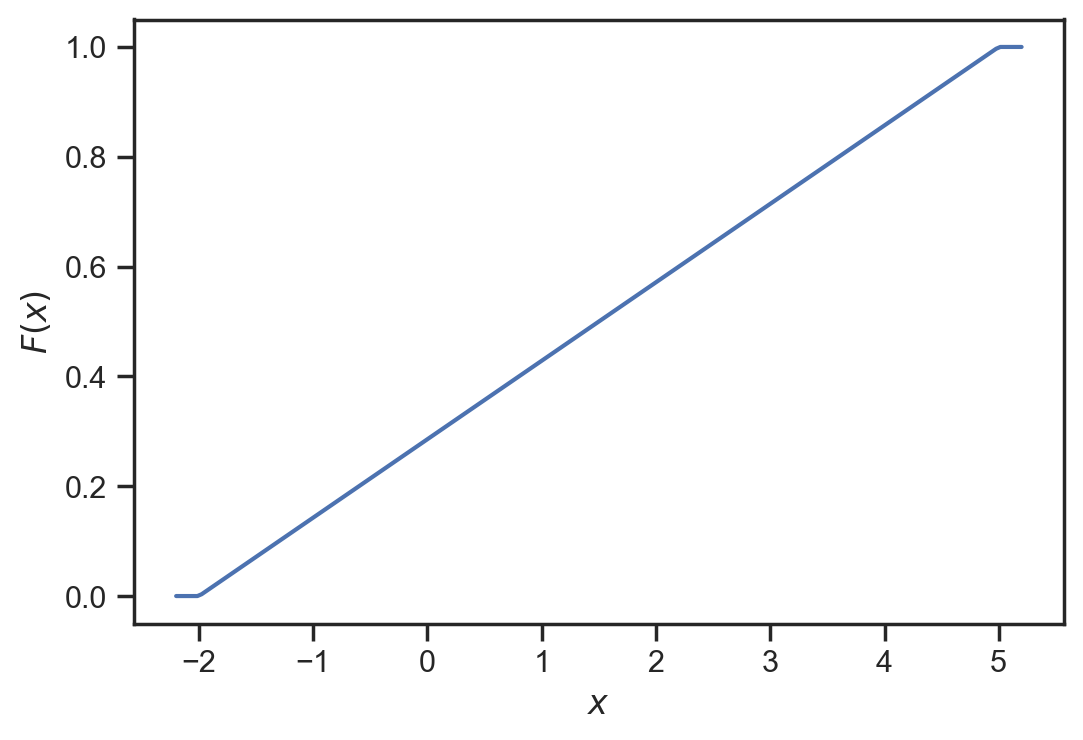

In [25]:
fig, ax = plt.subplots()
ax.plot(xs, X.cdf(xs))
ax.set_xlabel('$x$')
ax.set_ylabel('$F(x)$');

### Questions

+ Repeat the code above so that the random variable is $U([1, 10])$.